In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

drugset = pd.read_csv('../data/drug200.csv')

drugset.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


checking null in dataset $\rightarrow$ non-null

In [49]:
drugset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [50]:
drugset.Drug.value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

In [51]:
drugset.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [2]:
bin_age = [0, 19, 29, 39, 49, 59, 69, 80]
#category_age = ['<20s', '20s', '30s', '40s', '50s', '60s', '>60s']
category_age = [1, 2, 3, 4, 5, 6, 7] 
_drugset = drugset.copy(deep=True)
_drugset['Age_binned'] = pd.cut(_drugset['Age'], bins=bin_age, labels=category_age)
_drugset = _drugset.drop(['Age'], axis = 1)
_drugset.head()

,Sex,BP,Cholesterol,Na_to_K,Drug,Age_binned
0,F,HIGH,HIGH,25.355,DrugY,2
1,M,LOW,HIGH,13.093,drugC,4
2,M,LOW,HIGH,10.114,drugC,4
3,F,NORMAL,HIGH,7.798,drugX,2
4,F,LOW,HIGH,18.043,DrugY,6


In [3]:
bin_NatoK = [0, 9, 19, 29, 50]
#category_NatoK = ['<10', '10-20', '20-30', '>30']
category_NatoK = [0, 1, 2, 3]
_drugset['Na_to_K_binned'] = pd.cut(_drugset['Na_to_K'], bins=bin_NatoK, labels=category_NatoK)
_drugset = _drugset.drop(['Na_to_K'], axis = 1)
drugset.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [4]:

mask = drugset['Drug'].isin(['drugX', 'DrugY'])
print(drugset[mask].Drug.value_counts())
print(drugset[mask].shape)
_drugset = _drugset[mask]
_drugset.head()

DrugY    91
drugX    54
Name: Drug, dtype: int64
(145, 6)


,Sex,BP,Cholesterol,Drug,Age_binned,Na_to_K_binned
0,F,HIGH,HIGH,DrugY,2,2
3,F,NORMAL,HIGH,drugX,2,0
4,F,LOW,HIGH,DrugY,6,1
5,F,NORMAL,HIGH,drugX,2,0
6,F,NORMAL,HIGH,DrugY,4,1


In [5]:
#_drugset = _drugset.drop(['Sex'], axis = 1)
_drugset = _drugset.replace(['HIGH', 'NORMAL', 'LOW', 'DrugY', 'drugX'], [2, 1, 0, 1, 0])
_drugset = _drugset[['Drug', 'BP', 'Cholesterol', 'Age_binned', 'Na_to_K_binned']]

_drugset

,Drug,BP,Cholesterol,Age_binned,Na_to_K_binned
0,1,2,2,2,2
3,0,1,2,2,0
4,1,0,2,6,1
5,0,1,2,2,0
6,1,1,2,4,1
...,...,...,...,...,...
192,1,0,2,7,1
194,1,2,2,4,3
197,0,1,2,5,1
198,0,1,1,2,1


In [6]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
columns = _drugset.columns

dataset = _drugset.copy(deep=True)
dataset[columns] = min_max_scaler.fit_transform(dataset[columns])

print(dataset.head(10))
"""
DrugY = 1
drugX = 0

----------------------

High = 2
Normal = 1
Low = 0
"""

    Drug   BP  Cholesterol  Age_binned  Na_to_K_binned
0    1.0  1.0          1.0    0.166667        0.666667
3    0.0  0.5          1.0    0.166667        0.000000
4    1.0  0.0          1.0    0.833333        0.333333
5    0.0  0.5          1.0    0.166667        0.000000
6    1.0  0.5          1.0    0.500000        0.333333
8    1.0  0.5          1.0    0.833333        0.333333
9    1.0  0.0          0.0    0.500000        0.666667
11   1.0  1.0          0.0    0.333333        0.666667
12   1.0  0.0          1.0    0.500000        0.333333
13   1.0  0.0          1.0    1.000000        0.666667


'\nDrugY = 1\ndrugX = 0\n\n----------------------\n\nHigh = 2\nNormal = 1\nLow = 0\n'

In [7]:
print(dataset.shape)

(145, 5)


In [8]:
_dataset = dataset.copy(deep=True)
_dataset.to_csv("../data/drug145_5.csv", mode='w', index=False)

In [9]:
test = pd.read_csv('drug145_5.csv')

test.head()

,Drug,BP,Cholesterol,Age_binned,Na_to_K_binned
0,1.0,1.0,1.0,0.166667,0.666667
1,0.0,0.5,1.0,0.166667,0.000000
2,1.0,0.0,1.0,0.833333,0.333333
3,0.0,0.5,1.0,0.166667,0.000000
4,1.0,0.5,1.0,0.500000,0.333333


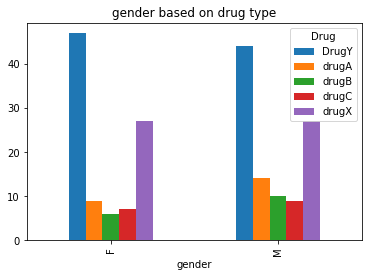

In [54]:
pd.crosstab(drugset.Sex, drugset.Drug).plot(kind="bar")
plt.title('gender based on drug type')
plt.xlabel('gender')
plt.show()

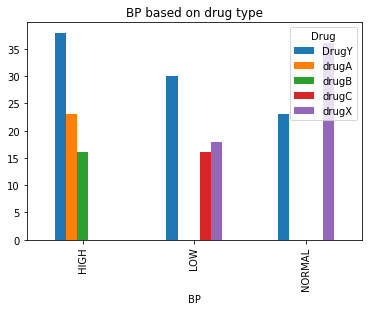

In [55]:
pd.crosstab(drugset.BP, drugset.Drug).plot(kind="bar")
plt.title('BP based on drug type')
plt.xlabel('BP')
plt.show()

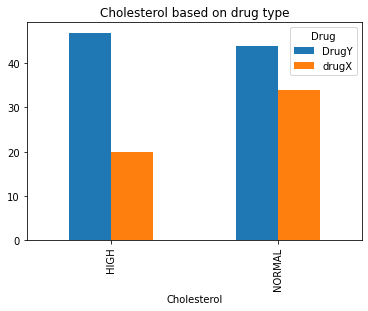

In [24]:
pd.crosstab(dataset.Cholesterol, dataset.Drug).plot(kind="bar")
plt.title('Cholesterol based on drug type')
plt.xlabel('Cholesterol')
plt.show()

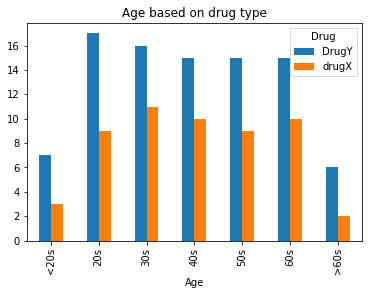

In [25]:
pd.crosstab(dataset.Age_binned, dataset.Drug).plot(kind="bar")
plt.title('Age based on drug type')
plt.xlabel('Age')
plt.show()

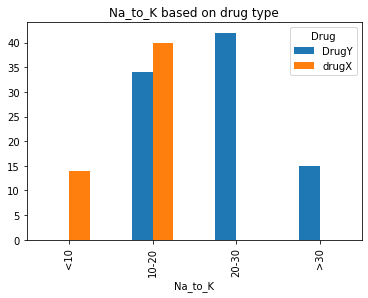

In [26]:
pd.crosstab(dataset.Na_to_K_binned, dataset.Drug).plot(kind="bar")
plt.title('Na_to_K based on drug type')
plt.xlabel('Na_to_K')
plt.show()

In [ ]:
pd.crosstab(drugset.Na_to_K_binned, drugset.Age).plot(kind="bar")
plt.xlabel('Na_to_K')
plt.ylabel('Age')
plt.show()

In [9]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

X_train.head()

,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL,Age_binned_<20s,Age_binned_20s,Age_binned_30s,Age_binned_40s,Age_binned_50s,Age_binned_60s,Age_binned_>60s,Na_to_K_binned_<10,Na_to_K_binned_10-20,Na_to_K_binned_20-30,Na_to_K_binned_>30
131,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1
96,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1
181,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0
19,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
153,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0
